# import libers


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/diabetes.csv')#read

In [4]:
df.head()#5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# distbution

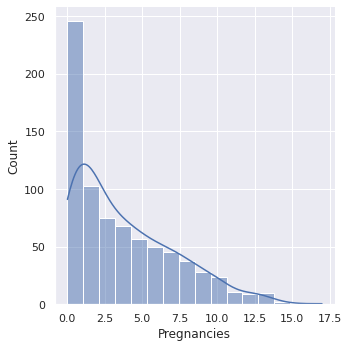

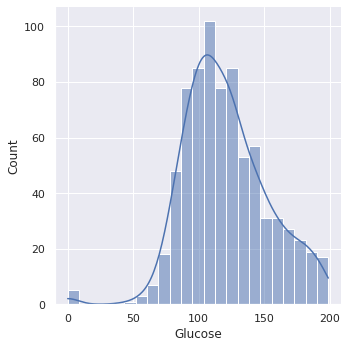

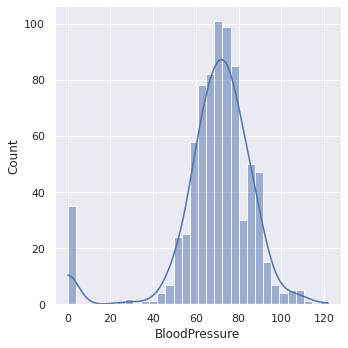

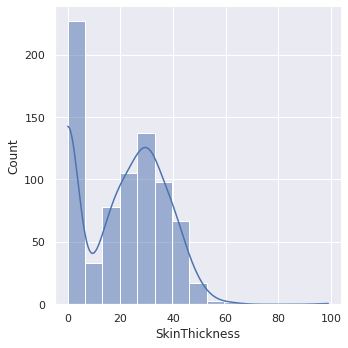

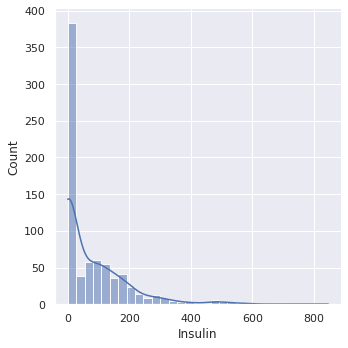

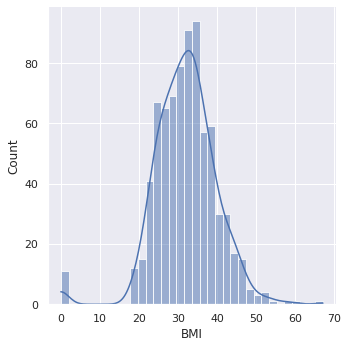

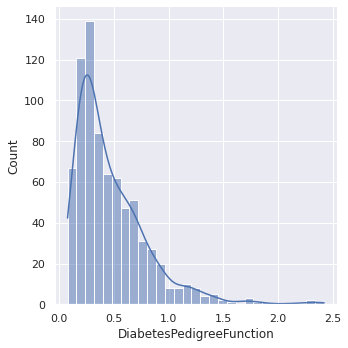

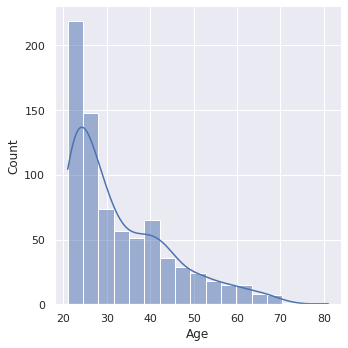

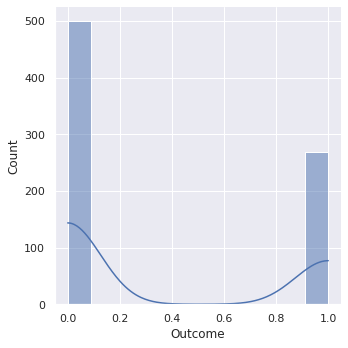

In [6]:
for i in df:
    sns.displot(df, x=df[i],kde=True)

# FE

In [7]:
#replace 0 with mean
zero_replace =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [8]:
for c in zero_replace:
    df[c] = df[c].replace(0,np.NaN)
    mean = df[c].mean()
    df[c] = df[c].replace(np.NaN,mean)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


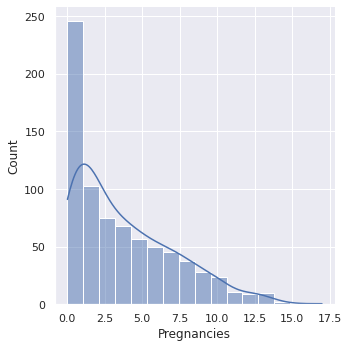

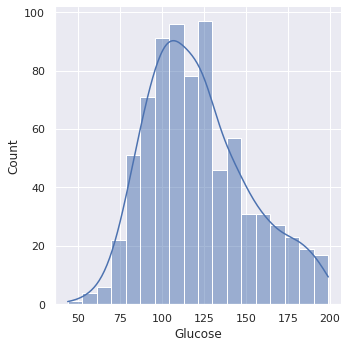

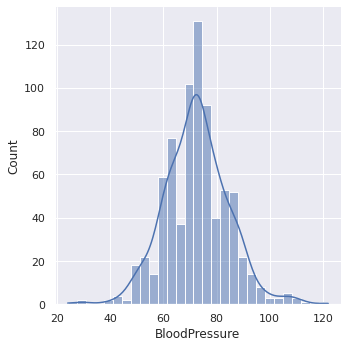

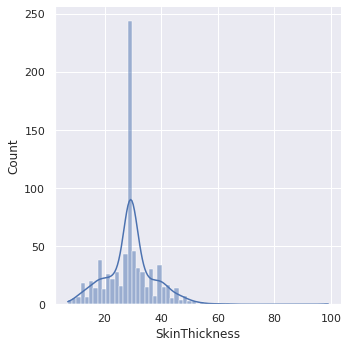

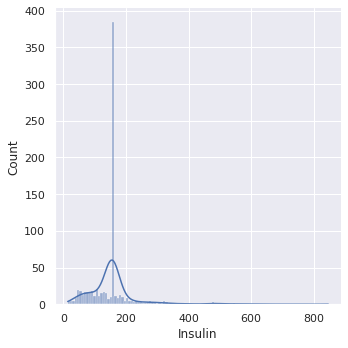

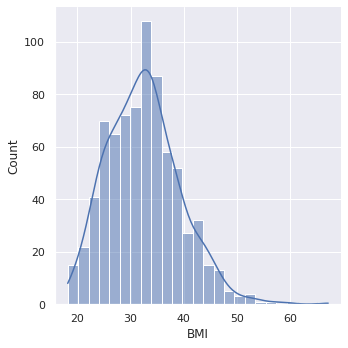

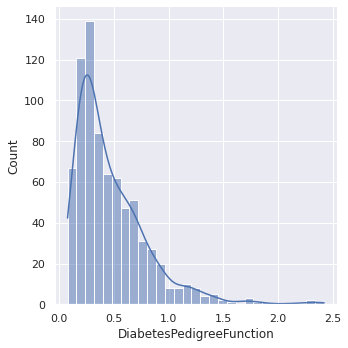

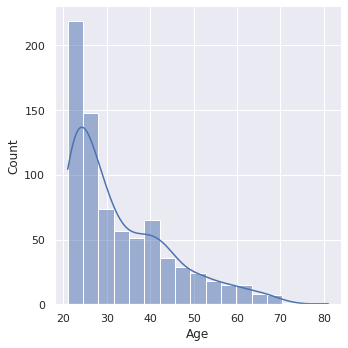

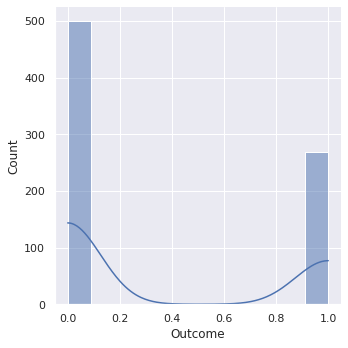

In [11]:
for i in df:
    sns.displot(df, x=df[i],kde=True)

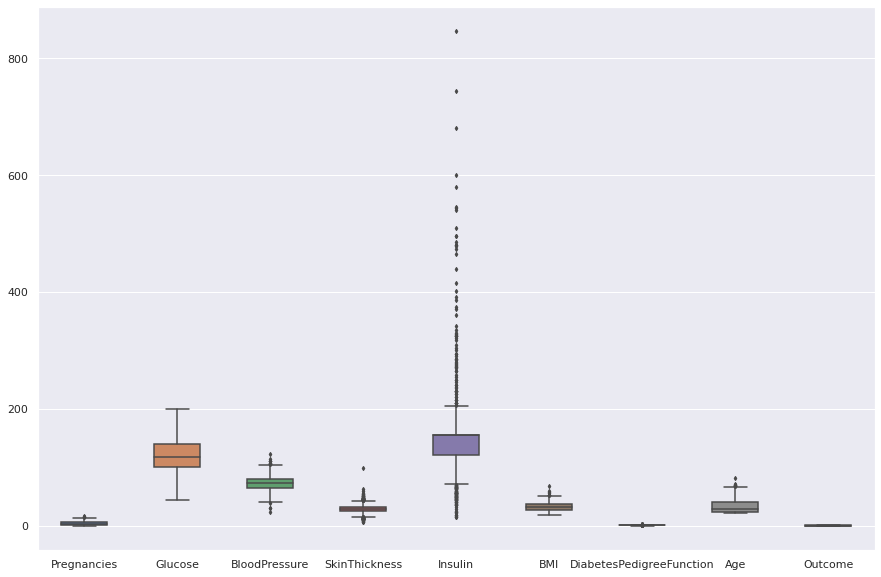

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
q = df['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [15]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']
 

In [17]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

# #train_test_split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)


# KNN

In [19]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
knn.score(x_train,y_train)

0.8177083333333334

In [21]:
knn.score(x_test,y_test)

0.7760416666666666

In [22]:
y_pred = knn.predict(x_test)

In [23]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : range(1,100,1),
               'n_neighbors' : range(1,100,1)
              }

In [24]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)


In [25]:
gridsearch.fit(x_train,y_train)


Streaming output truncated to the last 5000 lines.
[CV 1/5] END algorithm=brute, leaf_size=89, n_neighbors=90;, score=0.716 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=89, n_neighbors=90;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=89, n_neighbors=90;, score=0.730 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=89, n_neighbors=90;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=89, n_neighbors=90;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=89, n_neighbors=91;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=89, n_neighbors=91;, score=0.730 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=89, n_neighbors=91;, score=0.739 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=89, n_neighbors=91;, score=0.774 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=89, n_neighbors=91;, score=0.800 total time=   0.0s
[CV 1/5] END algorithm=brute,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 100),
                         'n_neighbors': range(1, 100)},
             verbose=3)

In [26]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 96}

In [35]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =1, n_neighbors =96)


In [36]:
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=96)

In [37]:
knn.score(x_train,y_train)


0.7534722222222222

In [38]:
knn.score(x_test,y_test)


0.7760416666666666

In [39]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
cm = confusion_matrix(y_test,y_pred)

In [41]:
cm

array([[120,   9],
       [ 34,  29]])

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.93      0.85       129
           1       0.76      0.46      0.57        63

    accuracy                           0.78       192
   macro avg       0.77      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192



In [45]:
#k-fold cross validation 
kfold = KFold(n_splits=96,random_state= 20,shuffle=True)
kfold.get_n_splits(x_train)

96

In [46]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =1, n_neighbors =96)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(x_train):
    X_train, X_test = x_train[train_index], x_train[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.656140350877193 and test score is :   0.6666666666666666
for k =  2
train_score is :   0.6543859649122807 and test score is :   0.8333333333333334
for k =  3
train_score is :   0.6578947368421053 and test score is :   0.5
for k =  4
train_score is :   0.656140350877193 and test score is :   0.6666666666666666
for k =  5
train_score is :   0.6543859649122807 and test score is :   0.8333333333333334
for k =  6
train_score is :   0.6543859649122807 and test score is :   0.8333333333333334
for k =  7
train_score is :   0.656140350877193 and test score is :   0.6666666666666666
for k =  8
train_score is :   0.6578947368421053 and test score is :   0.5
for k =  9
train_score is :   0.6543859649122807 and test score is :   0.8333333333333334
for k =  10
train_score is :   0.6526315789473685 and test score is :   1.0
for k =  11
train_score is :   0.6543859649122807 and test score is :   0.8333333333333334
for k =  12
train_score is :   0.6526315789473685 and te

([<matplotlib.axis.YTick at 0x7f1047635350>,
 <a list of 7 Text major ticklabel objects>)

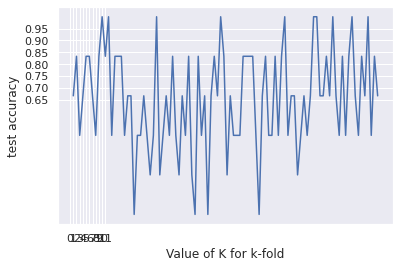

In [47]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))